# LIBRAIRIES

In [1]:
import datetime
import re
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

from bs4 import BeautifulSoup
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import unidecode

In [2]:
df_final=pd.read_csv("df_final.csv")

In [3]:
df_final.head()

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,...,C_C++,Docker,ABAP,WLang,city,Department_Search,salary_min,salary_max,salary_period,salary_mean
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,Toulouse,Haute-Garonne,30000.0,45000.0,year,37500.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,Bordeaux,Gironde,35000.0,40000.0,year,37500.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,Paris,75,40000.0,65000.0,year,52500.0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Lyon,Rhône,35000.0,60000.0,year,47500.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Corbas,Rhône,40000.0,45000.0,year,42500.0


# CLUSTERING & SELECTION CLASSES FOR ALL CONTRACTS 

In [4]:
#df_annually=df_final[df_final.salary_period=="year"]

In [5]:
#df_annually = df_annually.reset_index(drop=True)
#df_annually

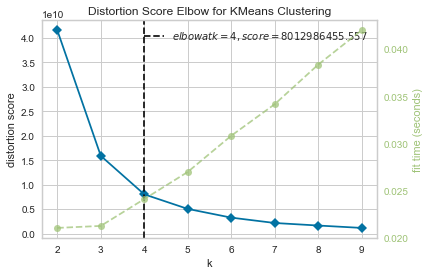

In [6]:
model= KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_final.salary_min.values.reshape(-1,1))
visualizer.poof()

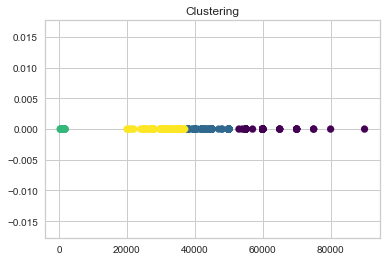

In [7]:
kmeans = KMeans(n_clusters=4).fit(df_final.salary_min.values.reshape(-1,1))
labels=kmeans.predict(df_final.salary_min.values.reshape(-1,1))
plt.title('Clustering')
plt.scatter(df_final.salary_min, np.zeros_like(df_final.salary_min), c=labels, cmap='viridis')
plt.show()

In [8]:
pd.Series(labels).value_counts()

1    177
3    164
0     59
2     25
dtype: int64

In [9]:
kmeans.cluster_centers_

array([[60661.01694915],
       [43428.24858757],
       [  862.4       ],
       [31536.31707317]])

In [10]:
labels

array([3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 0, 3,
       0, 0, 2, 2, 3, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 0, 1, 1, 3,
       0, 2, 3, 1, 3, 0, 1, 0, 1, 0, 3, 3, 2, 0, 1, 1, 3, 1, 1, 3, 3, 2,
       3, 3, 1, 1, 2, 3, 3, 0, 3, 0, 1, 0, 3, 1, 3, 1, 0, 1, 3, 1, 1, 3,
       0, 3, 1, 1, 2, 3, 1, 1, 3, 1, 3, 0, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 1, 1, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 1, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 3, 1, 1, 1, 1, 1, 1,
       3, 0, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1, 3, 2, 3, 1, 1, 3, 1, 1,
       0, 1, 1, 3, 1, 1, 3, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 2, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 0, 1, 3, 1, 3, 0, 3, 1, 1, 0,
       3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 1, 3, 1, 0, 3, 3, 1, 3,
       3, 1, 3, 1, 3, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 0, 3, 2, 1, 3, 3, 1, 1, 3, 0, 3,
       3, 3, 1, 0, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3,

In [11]:
#palette = [0, 1, 2, 3]
# key gives the new values you wish palette to be mapped to.
#key = np.array([0, 2, 3, 1])
#index = np.digitize(labels.ravel(), palette, right=True)
#key[index]

In [12]:
#labels=key[index]

In [13]:
y = labels

In [14]:
df_final["labels"]=pd.Series(labels)

## Extract clusters boundaries

In [15]:
print("The boundaries of label 0 are {} and {}"
      .format(df_final[df_final.labels==0]["salary_min"].min(),
              df_final[df_final.labels==0]["salary_min"].max()))
print("The boundaries of label 1 are {} and {}"
      .format(df_final[df_final.labels==1]["salary_min"].min(),
              df_final[df_final.labels==1]["salary_min"].max()))
print("The boundaries of label 2 are {} and {}"
      .format(df_final[df_final.labels==2]["salary_min"].min(),
              df_final[df_final.labels==2]["salary_min"].max()))
print("The boundaries of label 3 are {} and {}"
      .format(df_final[df_final.labels==3]["salary_min"].min(),
              df_final[df_final.labels==3]["salary_min"].max()))

The boundaries of label 0 are 53000.0 and 90000.0
The boundaries of label 1 are 38000.0 and 50000.0
The boundaries of label 2 are 300.0 and 1750.0
The boundaries of label 3 are 20000.0 and 37000.0


# MACHINE LEARNING

In [16]:
pd.set_option('display.max_columns', 100)

Selecting X

In [17]:
df_final_encoded = pd.get_dummies(df_final, columns=['city'], drop_first=True)

In [18]:
df_final_encoded

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,experience_max,BTS,DEUG,DUT,IUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,Department_Search,salary_min,salary_max,salary_period,salary_mean,labels,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Dardilly,city_Gradignan,city_Irigny,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Haute-Garonne,30000.0,45000.0,year,37500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,Gironde,35000.0,40000.0,year,37500.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,75,40000.0,65000.0,year,52500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,5.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rhône,35000.0,60000.0,year,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,1.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rhône,40000.0,45000.0,year,42500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Loire-Atlantique,37000.0,40000.0,year,38500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,75,30000.0,37000.0,year,33500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
422,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Rhône,1750.0,1750.0,week,1750.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
423,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Loire-Atlantique,22000.0,28000.0,year,25000.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_final.describe()

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,experience_max,BTS,DEUG,DUT,IUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,salary_min,salary_max,salary_mean,labels
count,425.000000,425.000000,425.000000,425.00000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.232941,0.018824,0.042353,0.04000,0.007059,0.174118,0.035294,0.640000,0.056471,0.160000,0.044706,0.032941,0.023529,0.162353,0.007059,0.007059,0.018824,0.016471,0.025882,0.080000,0.087059,0.011765,0.002353,2.898824,3.435294,0.025882,0.110588,0.016471,0.0,0.185882,0.385882,0.004706,0.105882,0.924706,0.021176,0.077647,0.018824,0.242353,0.425882,0.089412,0.030588,0.494118,0.136471,0.091765,0.477647,0.343529,0.051765,0.032941,0.218824,0.228235,0.192941,0.096471,0.143529,0.461176,0.120000,0.023529,0.284706,0.065882,0.221176,0.004706,0.004706,38727.802353,47292.249412,43010.025882,1.691765
std,0.423203,0.136062,0.201630,0.19619,0.083818,0.379658,0.184740,0.480566,0.231100,0.367038,0.206901,0.178693,0.151756,0.369209,0.083818,0.083818,0.136062,0.127427,0.158971,0.271613,0.282253,0.107952,0.048507,1.838176,2.341419,0.158971,0.313991,0.127427,0.0,0.389470,0.487377,0.068518,0.308050,0.264176,0.144142,0.267931,0.136062,0.429012,0.495059,0.285673,0.172402,0.500555,0.343692,0.289034,0.500089,0.475446,0.221813,0.178693,0.413936,0.420190,0.395072,0.295583,0.351025,0.499078,0.325345,0.151756,0.451806,0.248369,0.415528,0.068518,0.068518,14128.197425,17385.648144,15404.038267,1.124996
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,400.000000,350.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31200.000000,40000.000000,36000.000000,1.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.00000

We drop IUT because standard deviation (variance) =0

In [20]:
x= df_final_encoded.drop(['salary_mean','salary_min', 'salary_max', 'Department_Search', 'labels', 'salary_period', 'experience_max', "IUT"], axis=1)

In [21]:
x

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,BTS,DEUG,DUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Dardilly,city_Gradignan,city_Irigny,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
422,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
423,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
y = df_final["labels"]

##### ML

- STEP 1:
    * tester modèles classiques :
        * regression logistique (Ivan) SVM linear (Ivan)
        * SVM kernel (Ivan)
    * tester modèles de boost random forest (Ivan)
        * adaboost xgboost

- STEP 2 :
    * revoir les features X, et vérifier si amélioration de l'accuracy
    * faire grid search (tester au sein d'un mm modèle différents paramètres) (Ivan)

PREDICTIONS
    - CDI/CDD --> ANNUEL
    - STAGE --> MENSUEL
    - FREELANCE  --> HEBDOMADAIRE (conversion salaire journalier et horaire en hebdomadaire)

## CLASSIC MODELS

## Régression logistique

In [23]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

logistic = LogisticRegression(random_state =0, solver='liblinear', multi_class='auto')
logistic.fit(X_train, y_train)
print("L'accuracy est de {:.2f} %".format(logistic.score(X_test,y_test)*100))

L'accuracy est de 71.09 %


In [24]:
logistic.score(X_train,y_train)

0.8013468013468014

In [25]:
y_pred=logistic.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 8  8  0  2]
 [ 3 36  0 14]
 [ 0  0  8  0]
 [ 0 10  0 39]]


## SVM linear

In [26]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(svm_clf.score(X_test,y_test)*100))

L'accuracy est de 63.28 %


In [27]:
svm_clf.score(X_train,y_train)

0.8249158249158249

## SVM rbf

In [28]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf',gamma='auto', random_state=0)
svm_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(svm_clf.score(X_test,y_test)*100))

L'accuracy est de 62.50 %


In [29]:
svm_clf.score(X_train,y_train)

0.6296296296296297

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=0)
rf_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(rf_clf.score(X_test,y_test)*100))

L'accuracy est de 64.84 %


In [31]:
rf_clf.score(X_train,y_train)

0.6397306397306397

## BOOSTING MODELS

## Adaboost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train,y_train)
print("L'accuracy est de {:.2f} %".format(ada_clf.score(X_test,y_test)*100))

L'accuracy est de 64.84 %


In [33]:
ada_clf.score(X_train,y_train)

0.6363636363636364

## Xgboost

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1, eval_metric="merror")

xgb_clf.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

#print("L'accuracy est de {:.2f} %".format(xgb_clf.score(X_test,y_test)*100))
y_pred = xgb_clf.predict(X_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-merror:0.359375
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.3125
[2]	validation_0-merror:0.289062
[3]	validation_0-merror:0.28125
[4]	validation_0-merror:0.296875
[5]	validation_0-merror:0.296875
[6]	validation_0-merror:0.304688
[7]	validation_0-merror:0.296875
[8]	validation_0-merror:0.304688
Stopping. Best iteration:
[3]	validation_0-merror:0.28125



0.71875

In [91]:
xgb_clf.score(X_train,y_train)

0.7239057239057239

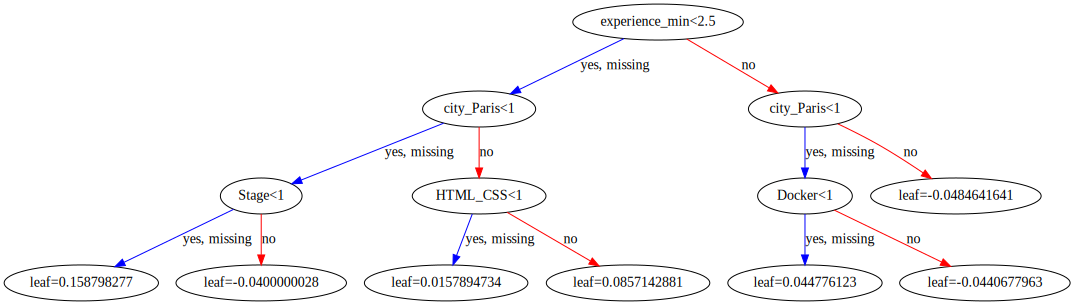

In [92]:
import xgboost as xgb
xgb.to_graphviz(xgb_clf, num_trees=xgb_clf.best_iteration)

# Feature selection - Correlation and P value

In [37]:
corr = x.corr()

In [38]:
corr.head(10)

,Title_data,Title_data_analyst,Title_data_scientist,Title_data_engineer,Title_data_architect,Title_ingenieur,Title_big_data,Title_developpeur,Title_dev_frontend,Title_dev_web,Title_dev_mobile,Title_dev_back_end,Title_dev_fullstack,Title_devops,Title_software_eng,Title_junior,Title_manager,Title_BI,Title_confirme,Title_lead,Title_senior,Title_consultant,Title_directeur,experience_min,BTS,DEUG,DUT,Licence,Master,Doctorat,Ingenieur,CDI,Stage,Freelance,CDD,Python,Java,Machine Learning,Deep Learning,Javascript,Swift,NoSQL,SQL,Agile,J2EE,Ruby,HTML_CSS,Php,Big_Data,Scala,Back_end,Git,R,PowerBI,Cloud,C_C++,Docker,ABAP,WLang,city_Blagnac,city_Bordeaux,city_Bruges,city_Canéjan,city_Castanet-Tolosan,city_Charbonnières-les-Bains,city_Corbas,city_Dardilly,city_Gradignan,city_Irigny,city_Labège,city_Limonest,city_Lissieu,city_Loire-Atlantique,city_Lyon,city_Marennes,city_Mérignac,city_Nantes,city_Paris,city_Pessac,city_Portet-sur-Garonne,city_Rhône,city_Rillieux-la-Pape,city_Saint-Herblain,city_Saint-Nazaire,city_Tassin-la-Demi-Lune,city_Toulouse,city_Toussieu,city_Villeneuve-lès-Bouloc,city_Villeurbanne,city_Écully
Title_data,1.000000,0.251344,0.381619,0.370412,0.153001,0.172658,0.347092,-0.607200,-0.110701,-0.210141,-0.092277,-0.101707,-0.085543,-0.212421,-0.046464,0.020025,0.210385,0.234829,0.015342,0.124749,-0.071452,0.094745,0.088127,0.109194,-0.054770,-0.141071,-0.071313,-0.163157,0.077728,0.043442,0.099820,-0.074802,-0.003730,0.131309,-0.076328,0.285876,-0.339542,0.393054,0.290015,-0.399891,-0.105569,0.075492,-0.047775,-0.222819,-0.128756,-0.039333,-0.264736,-0.246628,0.478182,0.197014,-0.146211,-0.141328,0.156220,0.281687,0.047046,-0.123912,-0.105905,0.043442,-0.037893,-0.026762,0.048109,-0.026762,-0.026762,-0.026762,-0.026762,0.088127,0.088127,-0.026762,-0.026762,-0.046464,-0.037893,-0.026762,-0.037893,-0.102541,-0.037893,0.088127,-0.018877,0.172292,-0.026762,-0.026762,-0.026762,-0.037893,0.043442,-0.026762,-0.037893,-0.141984,-0.026762,-0.026762,0.020025,-0.026762
Title_data_analyst,0.251344,1.000000,-0.029128,-0.028273,-0.011678,-0.063597,-0.026493,-0.184678,-0.033885,-0.060450,0.053816,-0.025563,-0.021501,-0.060978,-0.011678,0.195126,-0.019185,0.118107,-0.022577,-0.040844,-0.042772,-0.015113,-0.006727,-0.039517,-0.022577,-0.048840,-0.017924,-0.066184,0.032470,-0.009524,0.008606,0.039524,-0.020373,-0.040187,-0.019185,0.002472,-0.119295,-0.043402,-0.024604,-0.136889,-0.004628,-0.044027,0.006198,-0.100196,-0.032362,-0.025563,-0.073308,-0.075323,-0.067723,-0.045259,-0.056701,-0.023945,0.055410,-0.021501,-0.087384,-0.036784,-0.073812,-0.009524,-0.009524,-0.006727,-0.040187,-0.006727,-0.006727,-0.006727,-0.006727,-0.006727,-0.006727,-0.006727,-0.006727,-0.011678,-0.009524,-0.006727,-0.009524,-0.003706,-0.009524,-0.006727,-0.040844,0.092790,-0.006727,-0.006727,-0.006727,-0.009524,-0.009524,-0.006727,-0.009524,-0.040844,-0.006727,-0.006727,-0.011678,-0.006727
Title_data_scientist,0.381619,-0.029128,1.000000,-0.042927,-0.017731,-0.034942,0.086409,-0.280400,-0.051448,-0.091782,-0.045494,-0.038813,-0.032645,-0.092585,-0.017731,-0.017731,-0.029128,-0.027214,0.186460,-0.018949,0.017942,-0.022946,-0.010213,0.005225,-0.034280,-0.074155,-0.027214,-0.100488,0.121299,0.156254,0.041545,0.015732,-0.030932,0.113611,-0.029128,0.262773,-0.157499,0.507341,0.301882,-0.184472,-0.015535,-0.026377,-0.013979,-0.102925,-0.049136,-0.038813,-0.083046,-0.114364,0.222857,0.050002,-0.052767,-0.100808,0.209965,0.121511,-0.003229,-0.008754,-0.083920,-0.014461,-0.014461,-0.010213,-0.017360,-0.010213,-0.010213,-0.010213,-0.010213,-0.010213,-0.010213,-0.010213,-0.010213,-0.017731,-0.014461,-0.010213,-0.014461,-0.082766,-0.014461,-0.010213,-0.018949,0.099854,-0.010213,-0.010213,-0.010213,-0.014461,0.156254,-0.010213,-0.014461,-0.018949,-0.010213,-0.010213,-0.017731,-0.010213
Title_data_engineer,0.370412,-0.028273,-0.042927,1.000000,-0.017211,0.444562,-0.039043,-0.247150,-0.049938,-0.089087,-0.044158,-0.037674,-0.031686,-0.057306,-0.017211,-0.017211,-0.028273,-0.026415,

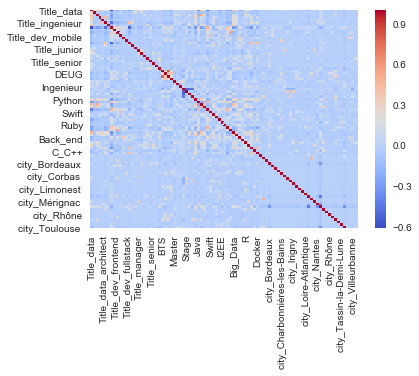

In [39]:
sns.heatmap(corr, cmap='coolwarm')

In [40]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.90:
            if columns[j]:
                columns[j] = False

In [41]:
selected_columns = x.columns[columns]
selected_columns.shape

(90,)

# Selecting columns based on p-value

In [43]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [44]:
#SL = 0.05
#data_modeled, selected_columns = backwardElimination(x.values, y, SL, selected_columns)


In [45]:
#new_x=pd.DataFrame(data = data_modeled, columns = selected_columns)

We don't consider P-value

# Optimizing by changing hyperparameters

 ## Optimizing logistic regression

In [46]:
logreg = LogisticRegression(solver='saga', n_jobs=-1)

params = {'penalty' : ['l1', 'l2'],
          'C' : np.logspace(-3, 3, 7),
          'fit_intercept': [True, False]}

logreg_gs = GridSearchCV(estimator=logreg, param_grid=params, n_jobs=-1, cv=10)

logreg_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (logreg_gs.best_params_, logreg_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {} ".format(logreg_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 100.0, 'fit_intercept': True, 'penalty': 'l1'} with a score of 64
Best estimator accuracy on test set 66.40625 


/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [47]:
logreg_gs.best_estimator_.score(X_train, y_train) * 100 

83.83838383838383

In [48]:
y_pred=logreg_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 7  7  0  4]
 [ 4 33  0 16]
 [ 0  0  8  0]
 [ 0 12  0 37]]


## Optimizing SVM classifier lineaire

In [49]:
svm = SVC()
params = [
          {'kernel': ['linear'],
           'C': [0.01, 0.1, 1, 10, 100, 1000]}]

svm_gs = GridSearchCV(estimator=svm, param_grid=params, n_jobs=-1, cv=10)

svm_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (svm_gs.best_params_, svm_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(svm_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 0.1, 'kernel': 'linear'} with a score of 65
Best estimator accuracy on test set 70.31 


/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
svm_gs.best_estimator_.score(X_train, y_train) * 100 

74.74747474747475

In [51]:
y_pred=svm_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 2 14  0  2]
 [ 0 40  0 13]
 [ 0  0  8  0]
 [ 0  9  0 40]]


## Optimizing SVM classifier 

In [52]:
svm = SVC()
params = [{'kernel': ['rbf'],
          'gamma': np.logspace(-2, 2, 5),
          'C': [0.01, 0.1, 1, 10, 100, 1000]},]

svm_gs = GridSearchCV(estimator=svm, param_grid=params, n_jobs=-1, cv=10)

svm_gs.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (svm_gs.best_params_, svm_gs.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(svm_gs.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 64
Best estimator accuracy on test set 71.88 


/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
svm_gs.best_estimator_.score(X_train, y_train) * 100 

78.45117845117845

In [54]:
y_pred=svm_gs.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 5 11  0  2]
 [ 2 40  0 11]
 [ 0  0  8  0]
 [ 0 10  0 39]]


## Optimizing Random Forest Classifier

In [55]:
forest = RandomForestClassifier()
criterion = ["gini", "entropy"]

n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             criterion=criterion)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


print("The best parameters are %s with a score of %0.0f" % (bestF.best_params_, bestF.best_score_ * 100 ))
print( "Best estimator accuracy on test set {} ".format(bestF.best_estimator_.score(X_test, y_test) * 100 ) )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  6.2min finished
/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} with a score of 69
Best estimator accuracy on test set 68.75 


In [56]:
bestF.best_estimator_.score(X_train, y_train) * 100 

99.66329966329967

In [57]:
y_pred=bestF.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 4  8  1  5]
 [ 1 41  0 11]
 [ 0  1  7  0]
 [ 0 13  0 36]]


## Optimizing XGboost

In [58]:
xgb = XGBClassifier(objective='multi:softmax', n_jobs=-1)

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'max_depth': [2, 3, 5]
        }

xgb_gs = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, cv=3)
xgb_gs.fit(X_train, y_train)

/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [2, 3, 5],
                         'min_chil

In [59]:
xgb_gs.score(X_train, y_train)

0.8249158249158249

In [60]:
xgb_gs.score(X_test, y_test)

0.703125

In [61]:
xgb_gs.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.5,
 'max_depth': 2,
 'min_child_weight': 1,
 'subsample': 0.8}

In [62]:
plot.khhkjhk

NameError: name 'plot' is not defined

# Model selection & salary prediction 

In [67]:
df_to_predict=pd.read_csv("to_predict.csv")

In [68]:
df_to_predict_encoded = pd.get_dummies(df_to_predict, columns=['city'], drop_first=True)

   Selecting only cities that matches train cities

In [84]:
# adding missing train cities
df_to_predict_encoded['city_Canéjan ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Lissieu ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Villeneuve-lès-Bouloc ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Pessac ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Marennes ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Saint-Nazaire ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Portet-sur-Garonne ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Corbas ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Irigny ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Dardilly ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Gradignan ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Toussieu ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Irigny ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))
df_to_predict_encoded['city_Charbonnières-les-Bains ']=pd.Series(np.zeros(len(df_to_predict_encoded), dtype=int))

Selectings just x columns

In [87]:
df_to_precict_encoded = df_to_predict_encoded[list(x.columns)]

In [109]:
df_to_precict_encoded.Department_Search

AttributeError: 'DataFrame' object has no attribute 'Department_Search'

In [93]:
#Predicting with best model -> xgb_clf

y_pred = xgb_clf.predict(df_to_predict_encoded)

df_to_predict_encoded["label_predicted"]=pd.Series(y_pred)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Department_Search

In [107]:
list(df_to_predict_encoded.dtypes.to_frame().index)

['Title_data',
 'Title_data_analyst',
 'Title_data_scientist',
 'Title_data_engineer',
 'Title_data_architect',
 'Title_ingenieur',
 'Title_big_data',
 'Title_developpeur',
 'Title_dev_frontend',
 'Title_dev_web',
 'Title_dev_mobile',
 'Title_dev_back_end',
 'Title_dev_fullstack',
 'Title_devops',
 'Title_software_eng',
 'Title_junior',
 'Title_manager',
 'Title_BI',
 'Title_confirme',
 'Title_lead',
 'Title_senior',
 'Title_consultant',
 'Title_directeur',
 'experience_min',
 'BTS',
 'DEUG',
 'DUT',
 'Licence',
 'Master',
 'Doctorat',
 'Ingenieur',
 'CDI',
 'Stage',
 'Freelance',
 'CDD',
 'Python',
 'Java',
 'Machine Learning',
 'Deep Learning',
 'Javascript',
 'Swift',
 'NoSQL',
 'SQL',
 'Agile',
 'J2EE',
 'Ruby',
 'HTML_CSS',
 'Php',
 'Big_Data',
 'Scala',
 'Back_end',
 'Git',
 'R',
 'PowerBI',
 'Cloud',
 'C_C++',
 'Docker',
 'ABAP',
 'WLang',
 'Department_Search',
 'city_Basse-Goulaine ',
 'city_Bassens ',
 'city_Blagnac ',
 'city_Bordeaux ',
 'city_Bouguenais ',
 'city_Bruges ',
 

In [ ]:
#Seeing to which contract correspond label 2 (300-1750)

df_to_predict_encoded[df_to_predict_encoded.Stage==1]